# Introduction to Python -- Class 3

(Date: 05/02/2025)

Previous classes:

1. Hello World!
2. Variables and simple data types
3. Readable printing 
4. Loops
5. Boolean logic
6. Functions
7. If statements
8. Lists

This class:

9. Python libraries: Numpy (Numerical Python)
10. Python libraries: OS (Reading and writing data)
11. Python libraries: Matplotlib for Plotting


## Python libraries: Numpy

One of the big advantages of Python is that you don't have to write functions from scratch because others have most likely already done it for you.

These functions are organized thematically into **libraries** or **modules**. To use them we first have to load them.

* One of the most complete libraries is **numpy**. You can find the full documentation of numpy here: https://numpy.org/doc/

* One module that will be very useful for us for reading and writing data (below) is the **os** module (coming from *Operating system*). You can find the full documentation of **os** here: https://docs.python.org/3/library/os.html

* If you are curious, explore other libraries here: https://docs.python.org/3/library/

**Recommendation**: Always import all the libraries and functions you use at the beginning of your code!

In [2]:
# The first lines of your code should import all the libraries and functions you are using throughout your code:
import os
import scipy
import numpy as np  # This way of importing prevents us from typing `numpy` every time. Instead, we can just type `np`
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib

In [3]:
root = np.sqrt(2)
print(root)

1.4142135623730951


Here, we will review some of the functionalities of the numpy, introduce its main elements (arrays) and functions.

This library is extensive and provides a lot of different funtionalities. We do not have time to go through it in detail so you are encouraged to explore it on your own at home. 

You should be familiar with the concept of *matrix* and *vector*. For example, the position of an object in classical mechanics is usually a vector indexed by three numbers corresponding to the $x$,$y$, and $z$ coordeniates:
$$
\vec{r}=\left(\begin{matrix} x\\y\\z\end{matrix}\right)\, .
$$

The operations that transform an $n$-dimensional vector into an $m$-dimensional are given by $m \times n$ matrices. Suppose $n=m=3$:
$$
A =\left(\begin{matrix}a_{11} & a_{12} & a_{13}\\a_{21} & a_{22} & a_{23}\\a_{31} & a_{32} & a_{33}\end{matrix}\right)
$$

As you can see, vectors and matrices are special types of lists. They contain elements of the same type (floats).

<br>

Because of this, numpy uses a special data structure called a **numpy array**. The syntax for creating an array is: `np.array([<list>])`.

Let us see some examples:

### Creating numpy arrays from lists

In [4]:
vec = np.array([1,2,3])  # A vector with three entries (in practice a 3x1 matrix)
A = np.array([[1,2,3], [4,5,6], [7, 8, 9]])  # A 3x3 matrix
B = np.array([[[1, 2], [3, 4]],[[5, 6], [7, 8]], [[9, 10], [11, 12]]])  # A matrix containing three 2x2 matrices

In [5]:
print(f'vec = {vec}')
print(f'A = {A}')
print(f'B = {B}')

vec = [1 2 3]
A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
B = [[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


The objects `vec`, `A`, and `B` are all of the type `ndarray`, provided by the `numpy` library:

In [6]:
type(vec), type(A), type(B)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

The difference between then is their shape, which we can get from the `ndarray` property: `ndarray.shape`.

In [7]:
print(vec.shape)
print(A.shape)
print(B.shape)

(3,)
(3, 3)
(3, 2, 2)


If we want to know the number of entries of a given numpy array we can retrieve that information using the property `ndarray.size`:

In [8]:
print(vec.size)
print(A.size)
print(B.size)

3
9
12


An equivalent way of obtaining exactly the same information is using the numpy functions `numpy.shape` and `numpy.size`:

In [9]:
print(np.shape(A))
print(np.size(A))

(3, 3)
9


So far, any element of type `numpy.ndarray` looks like a Python list (simple or nested). So why not just use Python lists for all calculations instead of creating a new type of object called array?

There are several reasons for this:

* Python lists are quite general. They can contain any type of object, they are also dynamically typed, but the big drawback is that **they do not support the action of mathematical functions**, such as matrix multiplication, dot product, etc. On the other hand, implementing such functions for Python lists would not have been very efficient precisely because of this dynamic typing.

<br>

* Contrary to this, arrays in Numpy are **statically typed** and are **homogeneous**. That is, the type of the elements is determined when the array is created. In this way, Numpy arrays manage memory much better. Due to static typing, fairly fast implementations of mathematical functions such as multiplication and addition of `numpy` arrays can be done in a compiled language (C and Fortran).

In [10]:
A.dtype

dtype('int64')

If we want to create an array with a specific type, we should do as follows:

In [11]:
M1 = np.array([[1, 2], [3, 4]], dtype=int)
M2 = np.array([[1, 2], [3, 4]], dtype=complex)

print(M1.dtype)
print(M2.dtype)

int64
complex128


### Creating arrays from Numpy generating functions

Rather than creating an array using a list, Numpy provides several functions that allow us to create different numpy arrays:

* `numpy.arange(a,b,c)` -> creates an array with the first element equal to `a`, the last element equal to `b-c`, and a step of `c`. Importantly, `b` is **NOT** a part of the array!

In [12]:
v = np.arange(0,10,1)
print(v)

v = np.arange(-1,1,0.1)
print(v)

[0 1 2 3 4 5 6 7 8 9]
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


* `numpy.linspace(a,b,c)` -> in this case both the start point (`a`) and the end point `b` are included in the array; `c` determines the size of the array (i.e. the number of entries):

In [13]:
v = np.linspace(0, 10, 11)
print(v)

v = np.linspace(-1, 1, 21)
print(v)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


* `numpy.zeros(shape)` -> Creates a numpy array with the given `shape` where every entry is 0.

In [14]:
Z1 = np.zeros(2, dtype=int)  # Here, we choose the type to be integer. We create a vector with two entries.
Z2 = np.zeros((3, 3))
Z3 = np.zeros((2,3,3))

print(f"Z1 = {Z1}")
print(f"Z2 = {Z2}")
print(f"Z3 = {Z3}")

Z1 = [0 0]
Z2 = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Z3 = [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


* `numpy.ones(shape)` -> Creates a numpy array with the given `shape` where every entry is 1.

In [15]:
O1 = np.ones(2, dtype=int)  # Here, we choose the type to be integer.
O2 = np.ones((3, 3))
O3 = np.ones((2, 3, 3))

print(f"O1 = {O1}")
print(f"O2 = {O2}")
print(f"O3 = {O3}")

O1 = [1 1]
O2 = [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
O3 = [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


* Here are some other useful examples:

In [16]:
Identity = np.eye(4)  # Creates a 4x4 identity matrix.
Diagonal = np.diag([1,2,3])  # Creates a matrix with the input list in the diagonal
Random = np.random.rand(5, 5)  # Creates a 5x5 matrix with random entries between 0 and 1


print(Identity)
print(Diagonal)
print(Random)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[0.31489023 0.75734925 0.09816978 0.21132561 0.80848355]
 [0.74226818 0.13521986 0.93218742 0.11829854 0.91169628]
 [0.87784354 0.49734315 0.38635433 0.74453656 0.8917707 ]
 [0.35256092 0.35014164 0.18852389 0.2050946  0.87959167]
 [0.91470103 0.32170078 0.01153125 0.12302028 0.02309504]]


### Manipulating arrays

To get a certain element of a numpy array things work similarly as they do for lists.

In [17]:
v = np.linspace(0, 10, 11)
print(v)
print(v[2])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
2.0


In [18]:
print(Random)
print(Random[1,1])
print(Random[-1,:])

[[0.31489023 0.75734925 0.09816978 0.21132561 0.80848355]
 [0.74226818 0.13521986 0.93218742 0.11829854 0.91169628]
 [0.87784354 0.49734315 0.38635433 0.74453656 0.8917707 ]
 [0.35256092 0.35014164 0.18852389 0.2050946  0.87959167]
 [0.91470103 0.32170078 0.01153125 0.12302028 0.02309504]]
0.13521985994344266
[0.91470103 0.32170078 0.01153125 0.12302028 0.02309504]


**Exercise**<br>

Use an array and a loop to calculate the values of the sine function from 0 to $2\pi$ in steps of 0.01.

In [19]:
# One possible solution:

x = 2 * np.pi * np.linspace(0, 1, 101)
sine = np.zeros(len(x))
for n in range(len(x)):
    sine[n] = np.sin(x[n])
print(sine)

[ 0.00000000e+00  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114701e-01
  9.82287251e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327926e-01  8.09016994e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779292e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333234e-01  6.27905195e-02  1.22464680e-16 -6.27905195e-02
 -1.25333234e-01 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01
 -5.87785252e-01 -6.37423

In [20]:
# A solution with the magic of numpy:

x = 2 * np.pi * np.linspace(0, 1, 101)
sine = np.sin(x)
print(sine)

[ 0.00000000e+00  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114701e-01
  9.82287251e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327926e-01  8.09016994e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779292e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333234e-01  6.27905195e-02  1.22464680e-16 -6.27905195e-02
 -1.25333234e-01 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01
 -5.87785252e-01 -6.37423

Almost every function in numpy accepts numpy arrays as inputs (as just illustrated for the sine). This saves as a lot of time and effort, since we don't need to write `for` loops.

This **element-wise** calculation also applies to arithmetic functions:

In [21]:
M = np.array([[1,2], [3,4]])
Msq = M**2
Mp2 = M + 2

print(f"M squared = {Msq}")
print(f"M + 2 = {Mp2}")

M squared = [[ 1  4]
 [ 9 16]]
M + 2 = [[3 4]
 [5 6]]


### Matrix operations

In [22]:
# Recall the previously defined variables A and vec
print(A)
print(vec)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]


In [23]:
# Using * for multiplying performs element-wise multiplication. 
print(vec*vec)
print(A*vec)
print(A*A)

[1 4 9]
[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


If we want to do matrix multiplication we need to do one of the following:

In [24]:
print(f"A@vec = {A@vec}")
print(f"matmul(A,vec) = {np.matmul(A,vec)}")
print(f"dot(A,vec) = {np.dot(A,vec)}")

A@vec = [14 32 50]
matmul(A,vec) = [14 32 50]
dot(A,vec) = [14 32 50]


In [25]:
print(f"A@A = {A@A}")
print(f"matmul(A,A) = {np.matmul(A,A)}")
print(f"dot(A,A) = {np.dot(A,A)}")

A@A = [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
matmul(A,A) = [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
dot(A,A) = [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


Let us see fome more examples of things that might be useful for you:

In [26]:
print(f"Outer product = {np.outer(vec,vec)}")
print(f"Power of a matrix = {np.linalg.matrix_power(A,2)}")
print(f"SVD = {np.linalg.svd(A)}")
print(f"Eigenvalues = {np.linalg.eigvals(A)}")

Outer product = [[1 2 3]
 [2 4 6]
 [3 6 9]]
Power of a matrix = [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
SVD = SVDResult(U=array([[-0.21483724,  0.88723069,  0.40824829],
       [-0.52058739,  0.24964395, -0.81649658],
       [-0.82633754, -0.38794278,  0.40824829]]), S=array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]), Vh=array([[-0.47967118, -0.57236779, -0.66506441],
       [-0.77669099, -0.07568647,  0.62531805],
       [-0.40824829,  0.81649658, -0.40824829]]))
Eigenvalues = [ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]


**Exercise**

Create the following matrix:

$$
    Z = \left(\begin{matrix} 2 & 3 & 2 & 4\\
                             4 & 1 & 0 & 17\\
                             24 & 0 & -1 & -3\\
                             4 & 2 & 14 & 2 \end{matrix}\right)
$$

1.  Write code that transforms matrix $Z$ into the following matrix (use for loops, while loops, and/or if statements)
    $$
        H = \left(\begin{matrix} 2 & 0 & 0 & 4\\
                             0 & 1 & 0 & 0\\
                             0 & 0 & -1 & 0\\
                             4 & 0 & 0 & 2 \end{matrix}\right)
    $$
2. Write code that extracts from $H$ the following $2\times 2$ matrix (use for loops, while loops, and/or if statements). Hint: Search the function `numpy.delete` in the numpy documentation:
   $$
       X=\left(\begin{matrix} 2 & 4 \\
                            4 & 2\end{matrix}  \right)
   $$
3. Take the exponential of the matrix $X$ (think before you code!)
   $$
       A = \exp(-i\pi X)
   $$

In [27]:
Z = np.array([[2,3,2,4],[4,1,0,17],[24,0,-1,-3],[4,2,14,2]])
print(Z)

[[ 2  3  2  4]
 [ 4  1  0 17]
 [24  0 -1 -3]
 [ 4  2 14  2]]


In [28]:
# For 1. (using two for loops and one if statement):

H = Z.copy()
for m in range(1,5):
    for n in range(1,5):
        if m*n==2 or m*n==3 or m*n==8 or m*n==12:
            H[n-1,m-1] = 0
print(B)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


In [29]:
# For 1. (using two while loops and two if statements)

H = Z.copy()
m = 0
n = 0
while n<=3:
    while m<=3:
        if (n==0 or n==3) and (m==1 or m==2):
            H[n,m]=0
        elif (n==1 or n==2) and (m==0 or m==3):
            H[n,m]=0 
        m = m+1
    n = n+1
    m = 0    
print(H)

[[ 2  0  0  4]
 [ 0  1  0  0]
 [ 0  0 -1  0]
 [ 4  0  0  2]]


In [30]:
# For 2., using two for loops and one if

indices = []
for n in range(2):
    for m in range(4):
        if 0 < m <3:
            indices.append(m)
    H = np.delete(H,indices,n)        
print(H)          

[[2 4]
 [4 2]]


In [31]:
# For 3.,

# (a) Start by calculating the eigenvalues and eigenvector:
Eval, Evec= np.linalg.eigh(H)

print(f"The eigenvalues are: {Eval}")
print(f"The eigenvectors are: {Evec}")

# (b) Write the function that calculates de exponential:
def mexp(eigenval, eigenvec):
    return np.matmul(
        np.matmul(eigenvec, np.diag(np.exp(-1j * np.pi * eigenval))),
        np.transpose(eigenvec))


print(f"The result of matrix exponentiation is: {mexp(Eval, Evec)}")

The eigenvalues are: [-2.  6.]
The eigenvectors are: [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
The result of matrix exponentiation is: [[1.00000000e+00+2.4492936e-16j 2.23711432e-17+4.8985872e-16j]
 [2.23711432e-17+4.8985872e-16j 1.00000000e+00+2.4492936e-16j]]


If you want it, Python probably has it...

In [32]:
# For this, we can also use scipy
A = scipy.linalg.expm(-1.j*np.pi*H)
print(A)

[[1.00000000e+00+8.88178420e-16j 1.25995997e-16+2.63814393e-15j]
 [1.25995997e-16+2.63814393e-15j 1.00000000e+00+8.88178420e-16j]]


---

## Reading and writing data

In [33]:
path = "/Users/fcrperes/Documents/3._Academic/PostDoc1/_Teaching/My_materials/"
folder = path + "Data/"

try:  #  This snippet of code will try to create a folder.
    os.mkdir(folder)  #  If, such a folder doesn't exist, it creates it.
except FileExistsError:  #  If it does exist, then it does nothing
    pass


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/Users/fcrperes/Documents/3._Academic/PostDoc1/_Teaching/My_materials/Data/'

You can use the following structure to save the vector `y` in a file `sine.npy` in the folder held in the variable `folder`.

In [ ]:
x = np.linspace(0, 1, 11)
y = np.sin(2 * np.pi * x)

print(y)
np.save(os.path.join(folder, 'sine'), y)

[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16]


What if we want to save several different arrays in the same file? In this case, the command `numpy.savez` is useful. It has the following structure: <br>

`numpy.savez("Direction where to save the arrays (including file name)", name1=array1, name2=array2, ...)`

<br>

Here is an example:

In [ ]:
np.savez(folder + "sine2", x=x, y=y)

We can also save .txt and .csv files. Here is an example:

In [ ]:
np.savetxt(folder + 'sine.txt', y)

**Exercise**<br>

Write a function for our problem of the interest rate standard whose results are automatically saved in an .npy file in a specific folder in you computer.

In [ ]:
def final_amount(initial, years):
    """This function calculates the final amount of money in the bank
    given an `initial` value and a number of `years`, at a fix
    interest rate of 5%.

    Args:
        initial (float): Initial amount of money
        years (int): Number of years in the bank
    """
    rate = 5.
    path = "/Users/fcrperes/Documents/3._Academic/PostDoc1/_Teaching/My_materials/Data/"

    try:  #  This snippet of code will try to create a folder.
        os.mkdir(folder)  #  If, such a folder doesn't exist, it creates it.
    except FileExistsError:  #  If it does exist, then it does nothing
        pass

    yearly_money = np.zeros(years + 1)
    for i in range(years + 1):
        yearly_money[i] = initial * (1 + rate / 100)**i

    np.save(path + "Money", yearly_money)

In [ ]:
final_amount(1000,10)

Now, how can we **read the data in these files**? We can use the command `numpy.load` as follows:

`numpy.load("Path to the file you want to read")`

Here is an example:

In [ ]:
results = np.load(folder + 'sine.npy')
print(results)

[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16]


What about when the file holds multiple arrays?

This is how you would do it:

In [ ]:
data = np.load(folder + "sine2.npz")
print(data["x"])
print(data["y"])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16]


---

## Plotting

We will now go through a very brief introduction to plotting with Python. We will do this using the **matplotlib**. For instructions on how to use matplotlib, you can go to the following link: https://matplotlib.org/stable/ . 

The documentation is very well structured. Since we have already loaded the library at the beginning of this notebook (as is recommended), we can go right ahead and use it.

We will start with a simple example where we will plot the sine function:

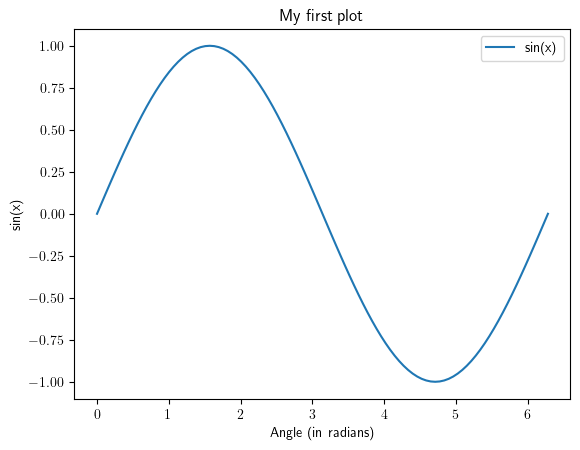

In [ ]:
x = 2*np.pi*np.linspace(0,1,101)
y = np.sin(x)

plt.plot(x, y, label = "sin(x)")  
plt.xlabel("Angle (in radians)")  # Label for the x axis
plt.ylabel("sin(x)")              # Label for the y axis
plt.legend()                      # Adding a legend (more useful when we plot multiple functions)
plt.title("My first plot")        # The title of the graph
plt.show()

We can use LaTeX to label the axis:

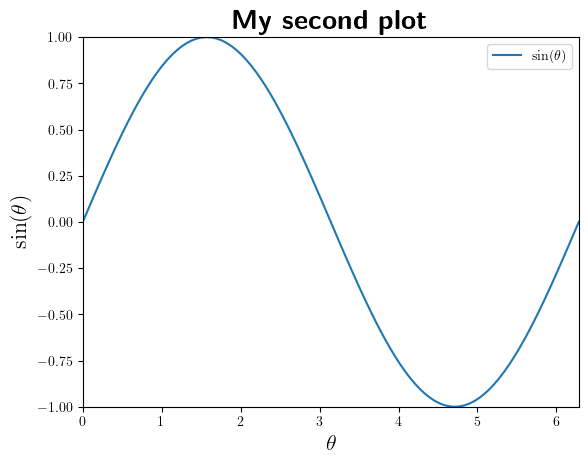

In [ ]:
plt.rcParams['text.usetex'] = True  # rcParams is a function that allows plot personalization

x = 2*np.pi*np.linspace(0,1,101)
y = np.sin(x)

plt.plot(x,y, label = r'$\sin(\theta)$')
plt.xlabel(r'$\theta$', fontsize = 16)           
plt.ylabel(r'$\sin(\theta)$', fontsize = 16)     
plt.legend()                                     
plt.title(r'\textbf{My second plot}', fontsize = 20)        
plt.axis([0, 2*np.pi, -1,1])  # Sets the length of the two axis. (Compare with the previous one)
plt.show()

Let us keep editing the graph and doing new things:

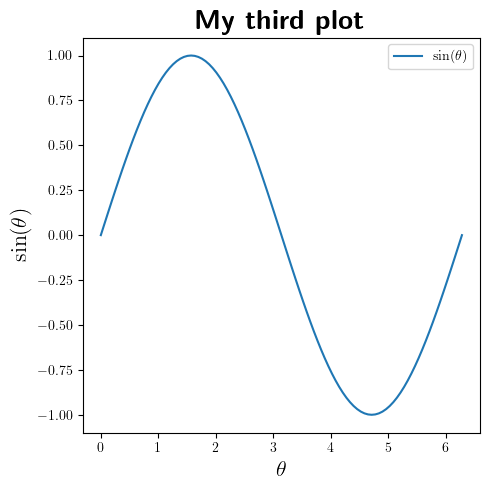

In [ ]:
x = 2*np.pi*np.linspace(0,1,101)
y = np.sin(x)

plt.figure(figsize=(5, 5), layout = 'tight')  # Creates an object for our plot!
plt.plot(x,y, label = r'$\sin(\theta)$')         
plt.xlabel(r'$\theta$', fontsize = 16)           
plt.ylabel(r'$\sin(\theta)$', fontsize = 16)     
plt.legend()                                     
plt.title(r'\textbf{My third plot}', fontsize = 20)
plt.show()

Let's put several curves in the same plot.

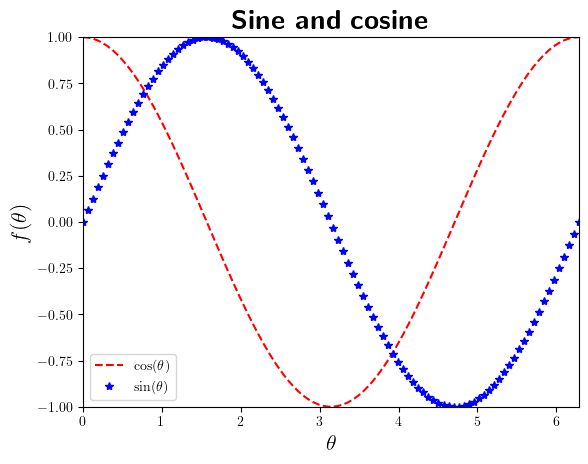

In [ ]:
plt.rcParams['text.usetex'] = True

x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
plt.plot(x,y1, 'r--', label = r'$\cos(\theta)$')   # The second parameter indicates the color and shape of the line
plt.plot(x,y2, 'b*', label = r'$\sin(\theta)$')

plt.xlabel(r'$\theta$', fontsize = 16)           
plt.ylabel(r'$f(\theta)$', fontsize = 16)     
plt.legend()                                     
plt.title(r'\textbf{Sine and cosine}', fontsize = 20)        
plt.axis([0, 2*np.pi, -1,1])                     
plt.show()

**Subfigures**

To create multiple plots in the same figure we use the `fig.subplots` function. This function divides our figure into several parts called `axs` (not axes) where we can then add our figures.

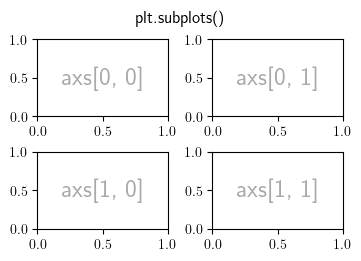

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")

for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            xycoords=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='darkgrey')
      
#axs[0,0].set_xlim(0,10)
fig.suptitle('plt.subplots()')
plt.show()

In the example above there is a low going on:
* `fig` describes the figure as a whole;
* `axs` in this case refers to all the subplots within the figure. Since we defined 2 rows and 2 columns of subplots, we need to call each subplot with axs[0,0] for the top left and axs[1,1] for the bottom right subplot;
* `matplotlib.pyplot.annotate(text, xy)` is a function with two mandatory argurments, and a lot of optional ones. Let us understand what these optional arguments are doing...

Note that calling subplots with no arguments creates a figure that uses a single graph. But notice that the functions for axis labels, etc. change slightly!

Using subplots is more versatile so I recommend you get used to making your plots this way. This is also the standard way examples are made in matplotlib.

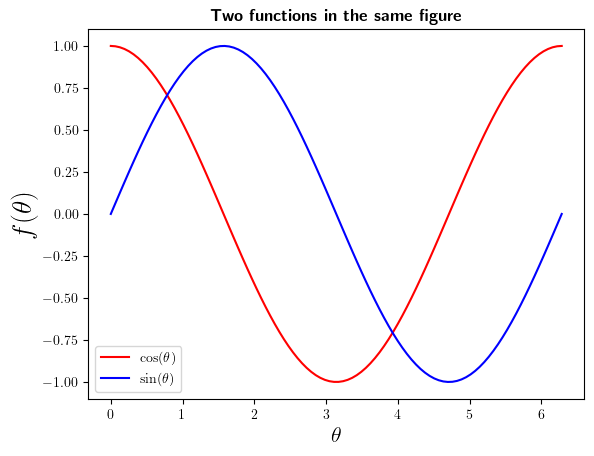

In [ ]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1, 'r', label = r'$\cos(\theta)$')    
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 20)
ax.set_title(r'\textbf{Two functions in the same figure}')
ax.legend()
plt.show()

**Saving plots**<br>

We can save plots with the command `plt.savefig()`


In [ ]:
folder =r"C:\Users\User\Documents\Fisica compu\Compu"
#"\\Usuarios\\Usuario\\Documentos\\'Fisica compu'\\Compu"
try:                         
    os.mkdir(folder)         
except FileExistsError:      
    pass

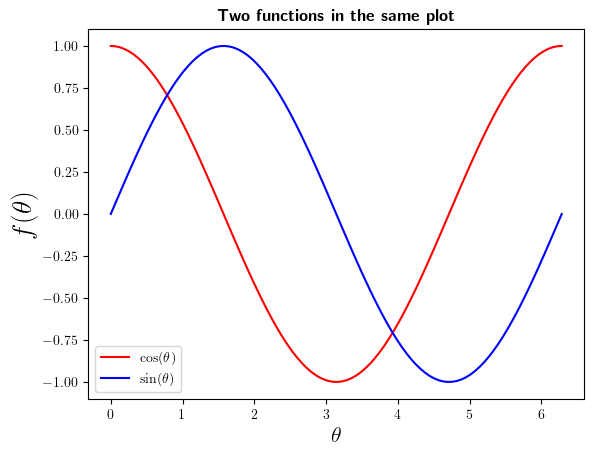

In [ ]:
plt.rcParams['text.usetex'] = True

x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1, 'r', label = r'$\cos(\theta)$')    
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 20)
ax.set_title(r'\textbf{Two functions in the same plot}')
ax.legend()
plt.savefig(os.path.join(folder,'FirstPlot.pdf'))  # Saves the graphic in .pdf
plt.show()     

**Changing tick marks on the axes**<br>

Many times you do *not* want to display all tick marks on the axis, but only *some* of them. This can be achieved using the set_xticks and set_yticks commands.

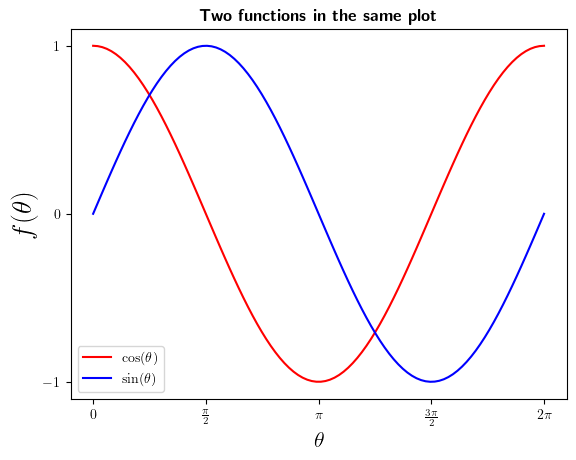

In [ ]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1, 'r', label = r'$\cos(\theta)$')
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 20)
ax.set_xticks([0., 0.5 * np.pi, np.pi, 1.5 * np.pi, 2 * np.pi],
              labels=[
                  "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",
                  r"$2\pi$"
              ])
ax.set_yticks([-1.0, 0., 1])
ax.set_title(r'\textbf{Two functions in the same plot}')
ax.legend()
plt.show()

**Annotating graphs**<br>

Many times you may want to add annotations to your graph. This is accomplished with the `axes.annotate()` command that we already looked briefly at before:<br>
<br>
`axes.annotate('text', xy=(x,y), xytext=(x,y), xycoords=the coordinate system for xy,
textcoords=the coordinate system for xytext, arrowprops = type of arrow between xy and xytext)`

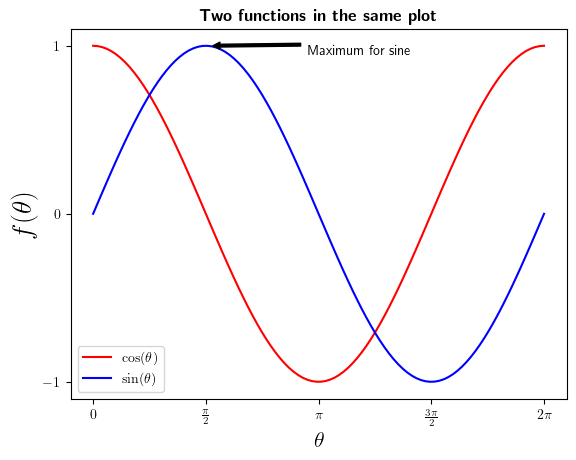

In [ ]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1, 'r', label = r'$\cos(\theta)$')    
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 20)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], 
              labels = ["$0$", r"$\frac{\pi}{2}$",
                       r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])
ax.set_title(r'\textbf{Two functions in the same plot}')
ax.legend()
ax.annotate('Maximum for sine', xy = (1.6,1), xytext = (3,0.95), 
            arrowprops = dict(facecolor='black', width = 2, headwidth = 5, 
                              headlength = 5, shrink = 0.05))
plt.show()

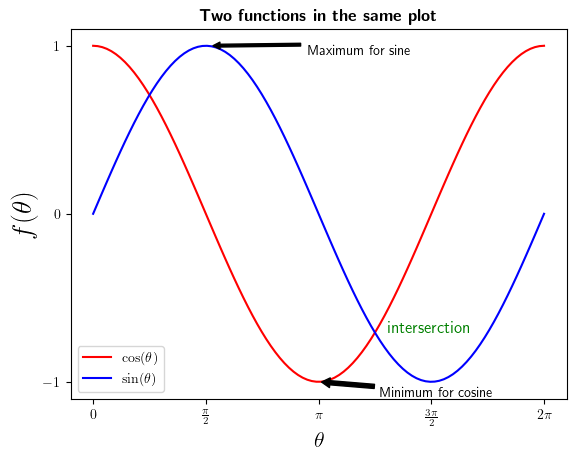

In [35]:
#exercise 
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1, 'r', label = r'$\cos(\theta)$')    
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 20)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], 
              labels = ["$0$", r"$\frac{\pi}{2}$",
                       r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])
ax.set_title(r'\textbf{Two functions in the same plot}')
ax.legend()
ax.annotate('Maximum for sine', xy = (1.6,1), xytext = (3,0.95), 
            arrowprops = dict(facecolor='black', width = 2, headwidth = 5, 
                              headlength = 5, shrink = 0.05))
ax.annotate('Minimum for cosine', xy = (3.14,-1), xytext = (4,-1.0875), 
            arrowprops = dict(facecolor='black', width = 3, headwidth = 7, 
                              headlength = 6, shrink = -0.05))
ax.text(3*np.pi/2-0.60, -np.sqrt(2)/2, 'interserction', fontsize=12, color='green')
ax.text(5*np.pi/4, -np.sqrt(2)/2, '', fontsize=12, bbox=dict(boxstyle='round', facecolor='red', edgecolor='black'))
plt.show()

**Insets**

Many times we want to focus on a part of a graph, or simply insert a second graph inside a larger graph. To create an inset we need to create a new axis inside our graph.

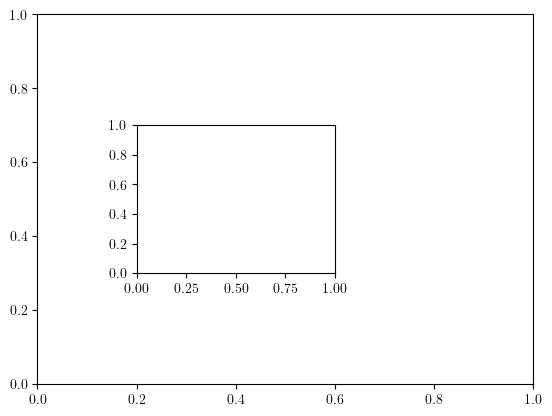

In [36]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.2, 0.3, 0.4, 0.4])
plt.show()

If you want to eliminate the tick marks you can do the following:

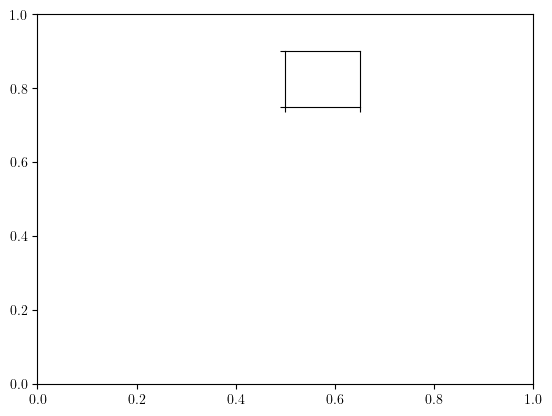

In [37]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.5, 0.75, 0.15, 0.15], xticklabels=[],yticklabels=[])
#axin1.tick_params(labelleft=False, labelbottom=False)
plt.show()

Let us create a graphic for the sine function, with an inset containing the cosine function.

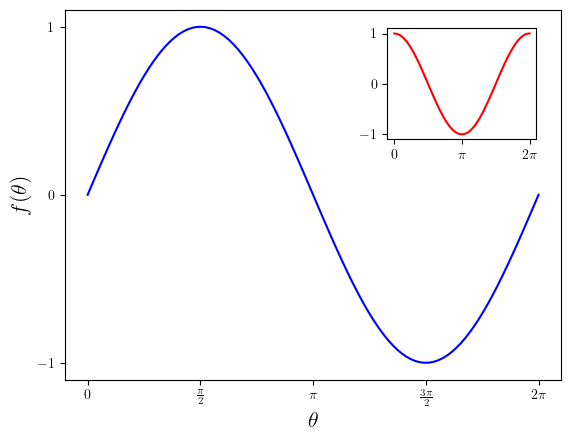

In [38]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 16)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], labels = ["$0$", r"$\frac{\pi}{2}$",
                       r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])

# Create an inset at position 0.65% on x axes, 0.65% on y axes and with size 30% x 30% of the original plot
axin1 = ax.inset_axes([0.65, 0.65, 0.30, 0.30])
axin1.plot(x,y1, 'r', label = r'$\cos(\theta)$')
axin1.set_xticks([0, np.pi, 2*np.pi], labels = ["$0$", r"$\pi$", r"$2\pi$"])
plt.show()

Now, let us create an inset that zooms in on part of the graphic of the sine fuction:

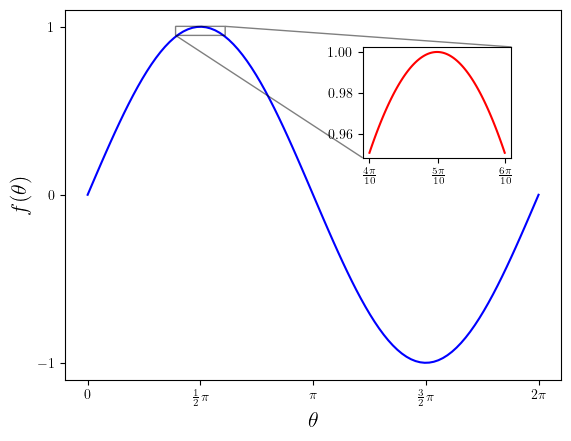

In [39]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,100)
y1 = np.cos(x)
y2 = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x,y2, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 16)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], labels = ["$0$", r"$\frac{1}{2}\pi$",
                       r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])

x_zoom = 2*np.pi*np.linspace(0.2,0.3,100)
y_zoom = np.sin(x_zoom)

axins = ax.inset_axes(
    [0.6, 0.6, 0.3, 0.3])
axins.plot(x_zoom, y_zoom, 'r')
axins.set_xticks([x_zoom[0], x_zoom[50], x_zoom[99]], 
                 labels=[r"$\frac{4\pi}{10}$",r"$\frac{5\pi}{10}$",r"$\frac{6\pi}{10}$"])
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.show()

**Error bars**<br>

You should never quote any result of a calculation without including its appropriate error (we are not engineers!). To include error bars we do the following:

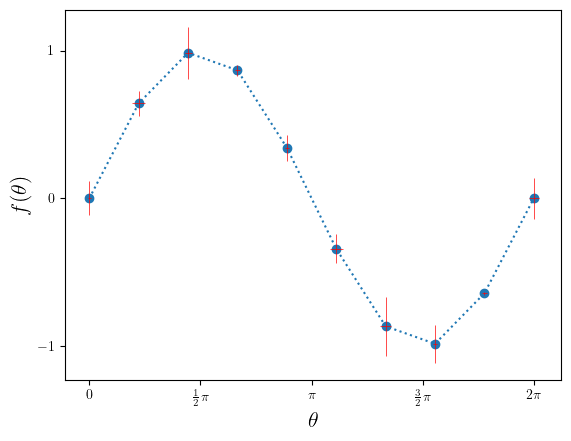

In [44]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,10)
y = np.sin(x)
x_err = 0.1*np.random.rand(10)
y_err = 0.2*np.random.rand(10)
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr = x_err, yerr = y_err, fmt='o', ecolor= 'r', elinewidth = 0.5, 
            barsabove=True, linestyle = 'dotted')
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 16)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], labels = ["$0$", r"$\frac{1}{2}\pi$",
                       r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])
plt.show()

If the errors are *not* symmetric:

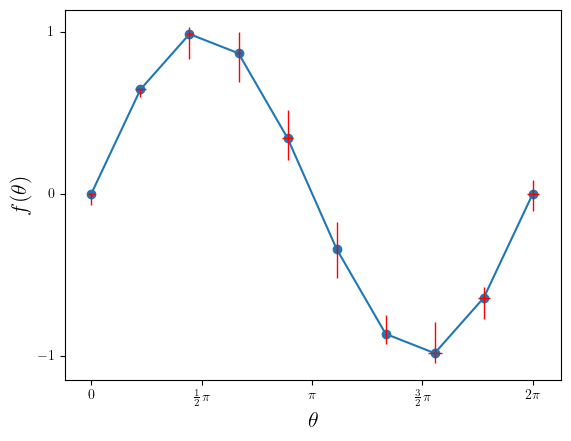

In [ ]:
plt.rcParams['text.usetex'] = True
x = 2*np.pi*np.linspace(0,1,10)
y = np.sin(x)
x_err = 0.1*np.random.rand(10)
y_min = 0.2*np.random.rand(10)
y_max = 0.2*np.random.rand(10)
y_err = [y_min, y_max] #con esto puedo poder el error + y el -
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr = x_err, yerr = y_err, marker='o', ecolor = 'r', 
            elinewidth = 1, barsabove=True)
ax.set_xlabel(r'$\theta$', fontsize = 16)
ax.set_ylabel(r'$f(\theta)$', fontsize = 16)
ax.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi], labels = ["$0$", r"$\frac{1}{2}\pi$",
                       r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax.set_yticks([-1.0, 0., 1])
plt.show()

**Homework assignment (in case you want to practice some more)**

Consider the following two functions<br>
$$
\begin{equation}
\begin{split}
\mathrm{sinc}(x)&=\frac{\sin(x)}{x}\\
\mathrm{sinc}(\pi\,x)&=\frac{\sin(\pi x)}{\pi x}
\end{split}
\end{equation}
$$

1. Create a graph for $\mathrm{sinc}(x)$ for $-6\leq x\leq 6$ and in an inset a graph for $\mathrm{sinc}(\pi x)$ for the same values ​​of x.
2. Annotate both graphs with arrows indicating the first minima of both functions.
3. Now plot both functions on the same graph and use an inset to zoom in on the region where these two curves overlap.
4. In each case above, it includes error bars taken randomly from a normal distribution with mean 0 and standard deviation 2.

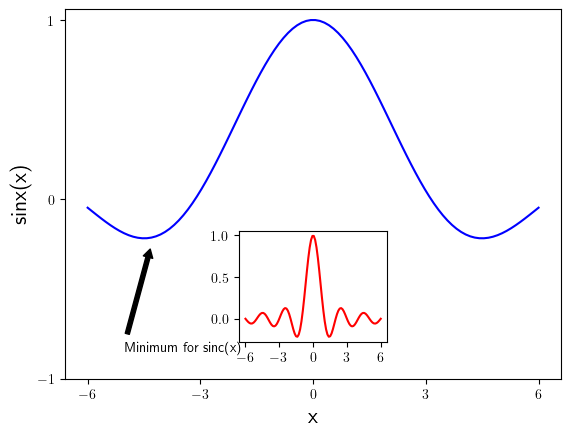

In [62]:
x = 6*np.linspace(-1,1,100)
y= np.sin(x)/x
y2=np.sin(np.pi*x)/(np.pi*x)

fig, ax = plt.subplots()
ax.plot(x,y, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'x', fontsize = 16)
ax.set_ylabel(r'sinx(x)', fontsize = 16)
ax.set_xticks([-6,-3,0,3,6])
ax.set_yticks([-1.0, 0., 1])

# Create an inset at position 0.65% on x axes, 0.65% on y axes and with size 30% x 30% of the original plot
axin1 = ax.inset_axes([0.35, 0.10, 0.30, 0.30])
axin1.plot(x,y2, 'r', label = r'$\sinc(\pi*x)$')
axin1.set_xticks([-6,-3,0,3,6])
axin1.annotate('Minimum for sinc(x)', xy = (-1.5,-0.75), xytext = (-3,-0.95), 
            arrowprops = dict(facecolor='black', width = 3, headwidth = 7, 
                              headlength = 6, shrink = -0.05))

ax.annotate('Minimum for sinc(x)', xy = (-4.3,-0.25), xytext = (-5,-0.85), 
            arrowprops = dict(facecolor='black', width = 3, headwidth = 7, 
                              headlength = 6, shrink = -0.05))
plt.show()



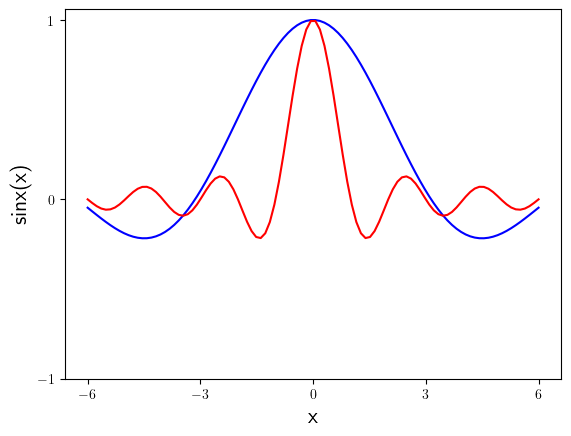

In [53]:
x = 6*np.linspace(-1,1,100)
y= np.sin(x)/x
y2=np.sin(np.pi*x)/(np.pi*x)

fig, ax = plt.subplots()
ax.plot(x,y, 'b', label = r'$\sin(\theta)$')
ax.set_xlabel(r'x', fontsize = 16)
ax.set_ylabel(r'sinx(x)', fontsize = 16)
ax.plot(x,y2, 'r', label = r'$\sinc(\pi*x)$')
ax.set_xticks([-6,-3,0,3,6])
ax.set_yticks([-1.0, 0., 1])